# Foundations of Statistical Modeling 

Prof. Dr. Stefan Kettemann

Spring term 2022

Exercise sheet 5, submit by Monday April 4th, 2022 on Moodle

Your name: Kritkorn Supyen

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 
import math
from scipy.stats import skew
from scipy.stats import kurtosis
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import lognorm
from scipy.stats import expon
from scipy.stats import weibull_min
from scipy.stats import poisson
from scipy.stats import norm
from pandas.core.dtypes.common import is_numeric_dtype
from pandas.core.dtypes.common import is_string_dtype
from pandas.api.types import CategoricalDtype
import psm

In [2]:
import importlib
importlib.reload(psm)

<module 'psm' from '/Users/kritkorns/Mike/Jacob/PSM/04_FinalProject/psm.py'>

In [111]:
pd.set_option('display.max_rows', 110)
pd.set_option('display.max_columns', 110)

#sns.set(style = "darkgrid")

## 1. Data Set [5 Points ] 

See the project guidelines on Moodle for hints how to find and choose interesting data sets. Describe the raw dataset you have chosen for the project in mathematical correct formalism, define the universe in which the data has been taken, the RV functions, and the data value spaces S. Describe whether you had to clean the data, whether there are any missing values. How did you deal with missing values? Show excerpts of the raw data. 

### Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

The data is from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [4]:
path = "/Users/kritkorns/Mike/Jacob/PSM/04_FinalProject/Dataset/house-prices-advanced-regression-techniques/"

In [5]:
file = path + "train.csv"
df_house = pd.read_csv(file, index_col='Id')

In [6]:
df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### 1.1 Describe the raw dataset you have chosen for the project in mathematical correct formalism, define the universe in which the data has been taken, the RV functions, and the data value spaces S.

In [8]:
def checkUnique(df):
    for column in df.columns.values:
        print('X({column}):Ω -> S({column}) = {data}\n'.format(column=column, data=df[column].unique()))

**Universe (Ω):** Residential homes in Ames, Iowa.

**RV Functions (X):** The measurement of the following features.

**Data Value Space (S):** Values in each features in the dataset. 

Please see the mathematical correct formalism below.

In [9]:
checkUnique(df_house)

X(MSSubClass):Ω -> S(MSSubClass) = [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

X(MSZoning):Ω -> S(MSZoning) = ['RL' 'RM' 'C (all)' 'FV' 'RH']

X(LotFrontage):Ω -> S(LotFrontage) = [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

X(LotArea):Ω -> S(LotArea) = [ 8450  9600 11250 ... 17217 13175  9717]

X(Street):Ω -> S(Street) = ['Pave' 'Grvl']

X(Alley):Ω -> S(Alley) = [nan 'Grvl' 'Pave']

X(LotShape):Ω -> S(LotShape) = ['Reg' 'IR1' 'IR2' 'IR3']

X(LandContour):Ω

### 1.2 Describe whether you had to clean the data, whether there are any missing values.

#### 1.2.1 Dealing with misinterpreted values

The missing values in the columns below are not really missing values. Most of them are written as 'NA' so pandas consider them as 'nan'. That's why we will have to change from 'nan' back to 'NA'. I also checked that there is no missing value on these columns by using "find" to find ',,' and ', ,' in the file.

- Alley: [nan 'Grvl' 'Pave']
    - Grvl: Gravel
    - Pave: Paved
    - NA: No alley access
- BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
    - GLQ: Good Living Quarters
    - ALQ: Average Living Quarters
    - BLQ: Below Average Living Quarters
    - Rec: Average Rec Room
    - LwQ: Low Quality
    - Unf: Unfinshed
    - NA: No Basement
- BsmtFinType2: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
    - GLQ: Good Living Quarters
    - ALQ: Average Living Quarters
    - BLQ: Below Average Living Quarters
    - Rec: Average Rec Room
    - LwQ: Low Quality
    - Unf: Unfinshed
    - NA: No Basement
- GarageFinish: ['RFn' 'Unf' 'Fin' nan]
    - Fin: Finished
    - RFn: Rough Finished
    - Unf: Unfinished
    - NA: No Garage
- Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
    - GdPrv: Good Privacy
    - MnPrv: Minimum Privacy
    - GdWo: Good Wood
    - MnWw: Minimum Wood/Wire
    - NA: No Fence
- BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]
    - Gd: Good Exposure
    - Av: Average Exposure (split levels or foyers typically score average or above)
    - Mn: Mimimum Exposure
    - No: No Exposure
    - NA: No Basement
- BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
    - Ex: Excellent
    - Gd: Good
    - TA: Average/Typical
    - Fa: Fair
    - NA: No Basement
- BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
    - Ex: Excellent
    - Gd: Good
    - TA: Average/Typical
    - Fa: Fair
    - NA: No Basement
- FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
    - Ex: Excellent
    - Gd: Good
    - TA: Average/Typical
    - Fa: Fair
    - NA: No Fireplace
- GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
    - Ex: Excellent
    - Gd: Good
    - TA: Average/Typical
    - Fa: Fair
    - NA: No Garage
- GarageCond: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
    - Ex: Excellent
    - Gd: Good
    - TA: Average/Typical
    - Fa: Fair
    - NA: No Garage
- PoolQC: [nan 'Ex' 'Fa' 'Gd']
    - Ex: Excellent
    - Gd: Good
    - TA: Average/Typical
    - Fa: Fair
    - NA: No Pool

In [10]:
def fillNullwithValue(df, columns, fill):
    df_temp = df.copy()
    for column in columns:
        print('{}:'.format(column))
        print('The missing values is {}.'.format(df_temp[column].isnull().sum()))
        df_temp[column].fillna(fill, inplace = True)
        print('The missing values is {}.'.format(df_temp[column].isnull().sum()))
        df_temp[column].unique()
        print('\n')
    return df_temp

In [11]:
columns = ['Alley', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'Fence', 'BsmtExposure', 'PoolQC',
           'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
fill = 'NA'
df_house_clean = fillNullwithValue(df_house, columns, fill)

Alley:
The missing values is 1369.
The missing values is 0.


BsmtFinType1:
The missing values is 37.
The missing values is 0.


BsmtFinType2:
The missing values is 38.
The missing values is 0.


GarageFinish:
The missing values is 81.
The missing values is 0.


Fence:
The missing values is 1179.
The missing values is 0.


BsmtExposure:
The missing values is 38.
The missing values is 0.


PoolQC:
The missing values is 1453.
The missing values is 0.


BsmtQual:
The missing values is 37.
The missing values is 0.


BsmtCond:
The missing values is 37.
The missing values is 0.


FireplaceQu:
The missing values is 690.
The missing values is 0.


GarageQual:
The missing values is 81.
The missing values is 0.


GarageCond:
The missing values is 81.
The missing values is 0.




#### 1.2.2 Dealing with categorical data

In [12]:
def categoricalize(df, columns, order=['Po','Fa','TA','Gd','Ex']):
    df_temp = df.copy()
    cat_type = CategoricalDtype(categories=order, ordered=True)
    for column in columns:
        if len(order) != 0:
            df_temp[column] = df_temp[column].astype(cat_type)
        elif len(order) == 0:
            df_temp[column] = df_temp[column].astype("category")
        df_temp[column + '_cat'] = df_temp[column].cat.codes
    return df_temp

1.2.2.1 Columns below can be changed to "Categorical data with order" with (Ex=Excellent > Gd=Good > TA=Average/Typical > Fa=Fair > Po=Poor > NA=No item).
- HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
- ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
- ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
- BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
- BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
- KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
- FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
- GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
- GarageCond: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
- PoolQC: [nan 'Ex' 'Fa' 'Gd']

In [13]:
columns = ['HeatingQC', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
          'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
order = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

df_house_clean = categoricalize(df_house_clean, columns, order)
df_house_clean.dtypes

MSSubClass            int64
MSZoning             object
LotFrontage         float64
LotArea               int64
Street               object
Alley                object
LotShape             object
LandContour          object
Utilities            object
LotConfig            object
LandSlope            object
Neighborhood         object
Condition1           object
Condition2           object
BldgType             object
HouseStyle           object
OverallQual           int64
OverallCond           int64
YearBuilt             int64
YearRemodAdd          int64
RoofStyle            object
RoofMatl             object
Exterior1st          object
Exterior2nd          object
MasVnrType           object
MasVnrArea          float64
ExterQual          category
ExterCond          category
Foundation           object
BsmtQual           category
BsmtCond           category
BsmtExposure         object
BsmtFinType1         object
BsmtFinSF1            int64
BsmtFinType2         object
BsmtFinSF2          

1.2.2.2 Columns below can be changed to "Categorical data with order" with (Gd=Good Exposure > Av=Average Exposure > Mn=Mimimum Exposure > No=No Exposure > NA=No Basement).
- BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]

In [14]:
columns = ['BsmtExposure']
order = ['NA', 'No', 'Mn', 'Av', 'Gd']

df_house_clean = categoricalize(df_house_clean, columns, order)
df_house_clean.dtypes

MSSubClass             int64
MSZoning              object
LotFrontage          float64
LotArea                int64
Street                object
Alley                 object
LotShape              object
LandContour           object
Utilities             object
LotConfig             object
LandSlope             object
Neighborhood          object
Condition1            object
Condition2            object
BldgType              object
HouseStyle            object
OverallQual            int64
OverallCond            int64
YearBuilt              int64
YearRemodAdd           int64
RoofStyle             object
RoofMatl              object
Exterior1st           object
Exterior2nd           object
MasVnrType            object
MasVnrArea           float64
ExterQual           category
ExterCond           category
Foundation            object
BsmtQual            category
BsmtCond            category
BsmtExposure        category
BsmtFinType1          object
BsmtFinSF1             int64
BsmtFinType2  

1.2.2.3 Columns below can be changed to "Categorical data without order".
- MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
- Street: ['Pave' 'Grvl']
- Alley: [nan 'Grvl' 'Pave']
- LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
- LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
- Utilities: ['AllPub' 'NoSeWa']
- LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
- LandSlope: ['Gtl' 'Mod' 'Sev']
- Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
- Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
- Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
- BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
- HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
- RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
- RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
- Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
- Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
- MasVnrType: ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
- Foundation: ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
- BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
- BsmtFinType2: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
- Heating: ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
- CentralAir: ['Y' 'N']
- Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
- Functional: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
- GarageType: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
- GarageFinish: ['RFn' 'Unf' 'Fin' nan]
- PavedDrive:['Y' 'N' 'P']
- Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
- MiscFeature: [nan 'Shed' 'Gar2' 'Othr' 'TenC']
- SaleType: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
- SaleCondition: ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']

So, we will have to change them to categorical data type.

In [15]:
columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence',
'MiscFeature', 'SaleType', 'SaleCondition']
order = []

df_house_clean = categoricalize(df_house_clean, columns, order)
df_house_clean.dtypes

MSSubClass              int64
MSZoning             category
LotFrontage           float64
LotArea                 int64
Street               category
                       ...   
PavedDrive_cat           int8
Fence_cat                int8
MiscFeature_cat          int8
SaleType_cat             int8
SaleCondition_cat        int8
Length: 123, dtype: object

#### 1.2.3 Find missing values per row in percentage.

In [16]:
display(psm.findMissingRows(df_house_clean, 'all'))

MSSubClass            0.000000
MSZoning              0.000000
LotFrontage          17.739726
LotArea               0.000000
Street                0.000000
                       ...    
PavedDrive_cat        0.000000
Fence_cat             0.000000
MiscFeature_cat       0.000000
SaleType_cat          0.000000
SaleCondition_cat     0.000000
Length: 123, dtype: float64

#### 1.2.4 Show only rows with missing values

In [17]:
display(psm.findMissingRows(df_house_clean, 'missing'))

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
MiscFeature    96.301370
dtype: float64

### 1.3 How did you deal with missing values? Show excerpts of the raw data.


#### 1.3.1 Delete columns with high percentage of missing values.

In [18]:
columns = ['MiscFeature']
df_house_clean = psm.deleteColumns(df_house_clean, columns)
display(psm.findMissingRows(df_house_clean, 'missing'))

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
dtype: float64

#### 1.3.2 Delete any rows with missing values.

In [19]:
df_house_clean = psm.deleteRows(df_house_clean)
display(psm.findMissingRows(df_house_clean, 'missing'))

Series([], dtype: float64)

#### 1.3.3 Export cleaned data to CSV file.

In [20]:
file = 'train_clean.csv'
df_house_clean.to_csv(path + file)

In [21]:
df_house_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HeatingQC_cat,ExterQual_cat,ExterCond_cat,BsmtQual_cat,BsmtCond_cat,KitchenQual_cat,FireplaceQu_cat,GarageQual_cat,GarageCond_cat,PoolQC_cat,BsmtExposure_cat,MSZoning_cat,Street_cat,Alley_cat,LotShape_cat,LandContour_cat,Utilities_cat,LotConfig_cat,LandSlope_cat,Neighborhood_cat,Condition1_cat,Condition2_cat,BldgType_cat,HouseStyle_cat,RoofStyle_cat,RoofMatl_cat,Exterior1st_cat,Exterior2nd_cat,MasVnrType_cat,Foundation_cat,BsmtFinType1_cat,BsmtFinType2_cat,Heating_cat,CentralAir_cat,Electrical_cat,Functional_cat,GarageType_cat,GarageFinish_cat,PavedDrive_cat,Fence_cat,MiscFeature_cat,SaleType_cat,SaleCondition_cat
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,...,NA,0,2,2008,WD,Normal,208500,5,4,3,4,3,4,0,3,3,0,1,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,2,6,1,1,4,6,1,2,2,4,-1,8,4
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,...,NA,0,5,2007,WD,Normal,181500,5,3,3,4,3,3,3,3,3,0,4,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,1,0,6,1,1,4,6,1,2,2,4,-1,8,4
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,...,NA,0,9,2008,WD,Normal,223500,5,4,3,4,3,4,3,3,3,0,2,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,2,6,1,1,4,6,1,2,2,4,-1,8,4
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,...,NA,0,2,2006,WD,Abnorml,140000,4,3,3,3,4,4,4,3,3,0,1,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,0,0,6,1,1,4,6,5,3,2,4,-1,8,0
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,...,NA,0,12,2008,WD,Normal,250000,5,4,3,4,3,4,3,3,3,0,3,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,2,6,1,1,4,6,1,2,2,4,-1,8,4


In [22]:
df_house_clean.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HeatingQC_cat,ExterQual_cat,ExterCond_cat,BsmtQual_cat,BsmtCond_cat,KitchenQual_cat,FireplaceQu_cat,GarageQual_cat,GarageCond_cat,PoolQC_cat,BsmtExposure_cat,MSZoning_cat,Street_cat,Alley_cat,LotShape_cat,LandContour_cat,Utilities_cat,LotConfig_cat,LandSlope_cat,Neighborhood_cat,Condition1_cat,Condition2_cat,BldgType_cat,HouseStyle_cat,RoofStyle_cat,RoofMatl_cat,Exterior1st_cat,Exterior2nd_cat,MasVnrType_cat,Foundation_cat,BsmtFinType1_cat,BsmtFinType2_cat,Heating_cat,CentralAir_cat,Electrical_cat,Functional_cat,GarageType_cat,GarageFinish_cat,PavedDrive_cat,Fence_cat,MiscFeature_cat,SaleType_cat,SaleCondition_cat
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.00000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.0,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.00000,1120.000000,1120.000000,1120.000000
mean,56.125000,70.663393,10123.302679,6.213393,5.561607,1972.234821,1985.664286,108.584821,438.791071,44.629464,594.313393,1077.733929,1173.958929,353.002679,4.572321,1531.533929,0.414286,0.055357,1.580357,0.381250,2.864286,1.042857,6.575893,0.604464,1978.374107,1.878571,503.047321,92.603571,46.171429,21.864286,3.351786,16.115179,2.93750,23.450000,6.341071,2007.795536,185522.229464,4.202679,3.431250,3.081250,3.524107,2.947321,3.553571,1.859821,2.968750,2.968750,0.019643,1.627679,3.029464,0.996429,0.995536,2.135714,2.782143,0.0,3.146429,0.048214,12.423214,2.028571,2.005357,0.495536,3.006250,1.437500,1.065179,9.735714,10.437500,1.792857,1.407143,3.219643,5.604464,1.032143,0.943750,3.691964,5.751786,2.358929,1.954464,1.888393,3.50625,-0.903571,7.479464,3.817857
std,41.785256,24.277552,8132.925949,1.380963,1.068582,30.965131,21.025704,189.557855,468.410812,157.893600,450.416962,445.373441,386.142921,438.673890,41.613827,523.941744,0.512377,0.232652,0.550220,0.498619,0.772269,0.206989,1.591855,0.632581,25.820205,0.654595,191.303698,121.922865,64.404019,61.305979,29.785672,57.825646,40.23996,165.832385,2.688756,1.335625,83034.490782,0.942963,0.583284,0.329657,0.875314,0.521128,0.670311,1.838665,0.267224,0.246343,0.282918,1.053418,0.649484,0.059681,0.262281,1.337361,0.707955,0.0,1.565943,0.234238,6.039444,0.897363,0.253603,1.210609,1.889001,0.841094,0.573656,3.172403,3.544385,0.627022,0.734897,2.254569,1.181393,0.268785,0.230507,1.036737,0.971900,1.823222,1.201235,0.436340,1.08444,0.531060,1.556654,1.069875
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2006.000000,35311.000000,1.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [23]:
df_house_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 1 to 1460
Columns: 122 entries, MSSubClass to SaleCondition_cat
dtypes: category(42), float64(3), int64(34), int8(43)
memory usage: 436.4 KB


## 5. Visualization

### 5.1 Finding Features

#### 5.1.1 Correlation

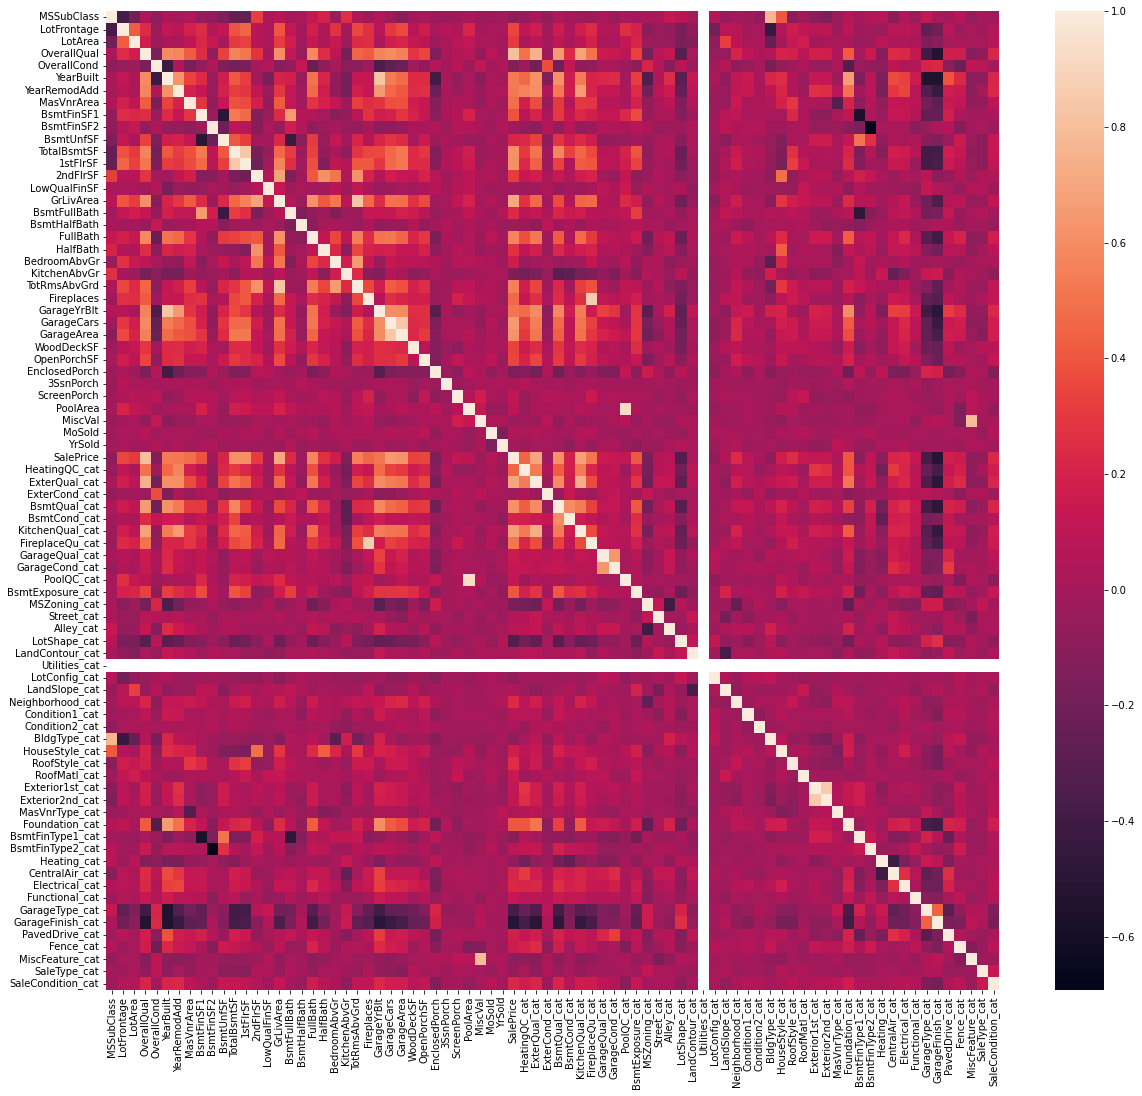

In [24]:
df_corr = df_house_clean.corr()
fig, ax = plt.subplots(figsize=(20,18))
ax = sns.heatmap(df_corr)

In [234]:
df_most_corrs = df_corr['SalePrice'].sort_values(ascending=False)
display(df_most_corrs)
df_most_corrs = df_most_corrs[(df_most_corrs <= -0.5) | (df_most_corrs>= 0.6)]
display(df_most_corrs)
df_most_corrs.shape


SalePrice            1.000000
OverallQual          0.798002
GrLivArea            0.705139
ExterQual_cat        0.699637
KitchenQual_cat      0.670975
GarageCars           0.647093
GarageArea           0.619318
TotalBsmtSF          0.615990
BsmtQual_cat         0.612506
1stFlrSF             0.608092
FullBath             0.566934
TotRmsAbvGrd         0.547148
YearBuilt            0.525895
YearRemodAdd         0.521700
FireplaceQu_cat      0.512155
GarageYrBlt          0.505255
MasVnrArea           0.488629
Fireplaces           0.461885
HeatingQC_cat        0.446634
BsmtExposure_cat     0.400322
Foundation_cat       0.399218
BsmtFinSF1           0.390280
LotFrontage          0.344297
OpenPorchSF          0.343301
WoodDeckSF           0.336875
2ndFlrSF             0.307071
LotArea              0.299960
HalfBath             0.268991
RoofStyle_cat        0.246869
Neighborhood_cat     0.239075
BsmtFullBath         0.236655
Electrical_cat       0.231195
SaleCondition_cat    0.226940
CentralAir

SalePrice           1.000000
OverallQual         0.798002
GrLivArea           0.705139
ExterQual_cat       0.699637
KitchenQual_cat     0.670975
GarageCars          0.647093
GarageArea          0.619318
TotalBsmtSF         0.615990
BsmtQual_cat        0.612506
1stFlrSF            0.608092
GarageFinish_cat   -0.524499
Name: SalePrice, dtype: float64

(11,)

In [235]:
corr_columns = df_most_corrs.index.to_list()
corr_columns

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'ExterQual_cat',
 'KitchenQual_cat',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'BsmtQual_cat',
 '1stFlrSF',
 'GarageFinish_cat']

#### 5.1.2 Feature Importance

In [236]:
df_house_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 1 to 1460
Columns: 122 entries, MSSubClass to SaleCondition_cat
dtypes: category(42), float64(3), int64(34), int8(43)
memory usage: 468.7 KB


,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,1stFlrSF,TotRmsAbvGrd,LotArea,GarageCars,GarageArea,YearRemodAdd,Neighborhood_cat,LotFrontage,YearBuilt,BsmtQual_cat
feature importance,0.626188,0.086469,0.047647,0.027613,0.026335,0.019017,0.013908,0.011281,0.010777,0.009381,0.008701,0.006944,0.006893,0.006343,0.005929


Index(['OverallQual', 'GrLivArea', '2ndFlrSF', 'TotalBsmtSF', 'BsmtFinSF1',
       '1stFlrSF', 'TotRmsAbvGrd', 'LotArea', 'GarageCars', 'GarageArea',
       'YearRemodAdd', 'Neighborhood_cat', 'LotFrontage', 'YearBuilt',
       'BsmtQual_cat'],
      dtype='object')

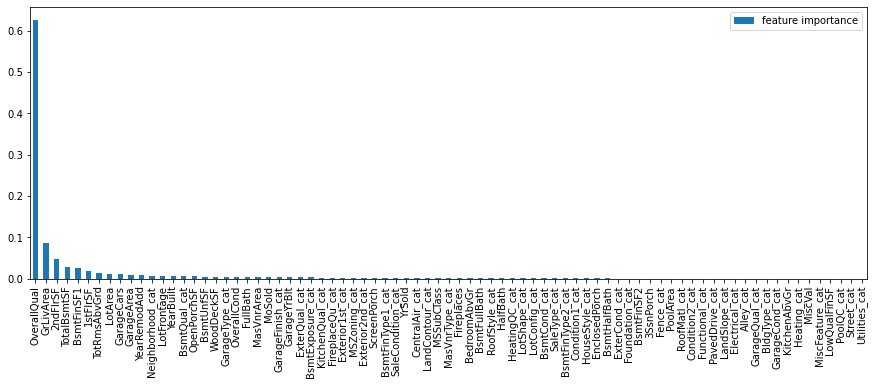

In [237]:
def featureImportance(x_train_scale, y_train, features): 
    from sklearn.ensemble import RandomForestRegressor
    
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1) 
    rf.fit(x_train_scale, y_train)
    feature_imp = rf.feature_importances_
    df_plot = pd.DataFrame(feature_imp, index=features, columns=['feature importance']).sort_values('feature importance', ascending=False)
    df_plot.plot(kind='bar', figsize=(15, 5), )
    return df_plot.iloc[:15].T

df_temp = df_house_clean.select_dtypes(include=['int64', 'int8', 'float64'])
df_temp_x = df_temp.loc[:, df_temp.columns != 'SalePrice']
df_temp_y = df_temp['SalePrice']
feature_imps = featureImportance(df_temp_x, df_temp_y, df_temp_x.columns.to_list())
feature_imps_columns = feature_imps.columns
display(feature_imps)
display(feature_imps_columns)


In [238]:
df_most_corrs

SalePrice           1.000000
OverallQual         0.798002
GrLivArea           0.705139
ExterQual_cat       0.699637
KitchenQual_cat     0.670975
GarageCars          0.647093
GarageArea          0.619318
TotalBsmtSF         0.615990
BsmtQual_cat        0.612506
1stFlrSF            0.608092
GarageFinish_cat   -0.524499
Name: SalePrice, dtype: float64

In [239]:
feature_imps

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,BsmtFinSF1,1stFlrSF,TotRmsAbvGrd,LotArea,GarageCars,GarageArea,YearRemodAdd,Neighborhood_cat,LotFrontage,YearBuilt,BsmtQual_cat
feature importance,0.626188,0.086469,0.047647,0.027613,0.026335,0.019017,0.013908,0.011281,0.010777,0.009381,0.008701,0.006944,0.006893,0.006343,0.005929


Pearson correlations capture linear relationships between the input and target variables. Therefore this only makes sense for continuous inputs and a continuous target variable, and not continuous inputs with a binary/categorical output. Correlations essentially measure the positive/negative 'change' in one feature as you increase/decrease the other.

#### 5.1.3 Choose features

In [468]:
features = (df_most_corrs.index | feature_imps.columns).to_list()
display(features)
display(len(features))

/var/folders/b6/0148n3pj1pj85jmltqmq67r40000gn/T/ipykernel_20192/3139373180.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  features = (df_most_corrs.index | feature_imps.columns).to_list()


['1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtQual_cat',
 'ExterQual_cat',
 'GarageArea',
 'GarageCars',
 'GarageFinish_cat',
 'GrLivArea',
 'KitchenQual_cat',
 'LotArea',
 'LotFrontage',
 'Neighborhood_cat',
 'OverallQual',
 'SalePrice',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

19

### 5.2 Distribution

In [259]:
df_house_clean[features].describe()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtQual_cat,ExterQual_cat,GarageArea,GarageCars,GarageFinish_cat,GrLivArea,KitchenQual_cat,LotArea,LotFrontage,Neighborhood_cat,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,1173.958929,353.002679,438.791071,3.524107,3.431250,503.047321,1.878571,1.954464,1531.533929,3.553571,10123.302679,70.663393,12.423214,6.213393,185522.229464,6.575893,1077.733929,1972.234821,1985.664286
std,386.142921,438.673890,468.410812,0.875314,0.583284,191.303698,0.654595,1.201235,523.941744,0.670311,8132.925949,24.277552,6.039444,1.380963,83034.490782,1.591855,445.373441,30.965131,21.025704
min,438.000000,0.000000,0.000000,0.000000,2.000000,160.000000,1.000000,0.000000,438.000000,2.000000,1300.000000,21.000000,0.000000,2.000000,35311.000000,3.000000,0.000000,1880.000000,1950.000000
25%,894.000000,0.000000,0.000000,3.000000,3.000000,360.000000,1.000000,2.000000,1154.750000,3.000000,7590.000000,60.000000,7.000000,5.000000,130875.000000,5.000000,803.750000,1953.000000,1966.000000
50%,1097.000000,0.000000,374.500000,4.000000,3.000000,484.000000,2.000000,2.000000,1479.000000,3.000000,9399.000000,70.000000,12.000000,6.000000,164800.000000,6.000000,1008.000000,1974.000000,1995.000000
75%,1411.250000,728.000000,702.500000,4.000000,4.000000,600.250000,2.000000,3.000000,1776.000000,4.000000,11361.250000,80.000000,17.000000,7.000000,219500.000000,7.000000,1327.250000,2003.000000,2005.000000
max,4692.000000,2065.000000,5644.000000,5.000000,5.000000,1418.000000,4.000000,3.000000,5642.000000,5.000000,215245.000000,313.000000,24.000000,10.000000,755000.000000,12.000000,6110.000000,2010.000000,2010.000000


In [316]:
def plotpdf(df, x, ax, kde=True):
    df_temp = df.copy()
    def annotate(**kws):
        value = psm.distributionValue(df_temp[x])
        annotate_value = 'mean: {:0.2f}\nstd: {:0.2f}\nskew: {:0.2f}\nkurt: {:0.2f}'.format(value['mean'],value['std'],value['skewness'],value['kurtosis'])
        #ax = plt.gca()
        if value['skewness'] < 0:
            x_anotate = 0.05
        else:
            x_anotate = 0.7
        ax.annotate(annotate_value, xy=(x_anotate, .6), xycoords=ax.transAxes)

    sns.histplot(df_temp, x=x, kde=kde, ax=ax)
    ax.set_title(x)
    ax.tick_params(axis='x', rotation=0)
    plt.tight_layout()
    annotate()
    return ax

def reshapeToPlot(row_num, a_list):
    col_mod = int(len(a_list)%row_num)
    if col_mod != 0:
        col_num = int((len(a_list)-col_mod+row_num)/row_num)
    else:
        col_num = int((len(a_list))/row_num)

    a_list_reshape = np.array(a_list)
    a_list_reshape = np.append(a_list_reshape, list(range(0, (row_num*col_num) - len(a_list))))
    #display(a_list_reshape)
    a_list_reshape = a_list_reshape.reshape(row_num, col_num)
    #display(a_list_reshape)
    return a_list_reshape
    

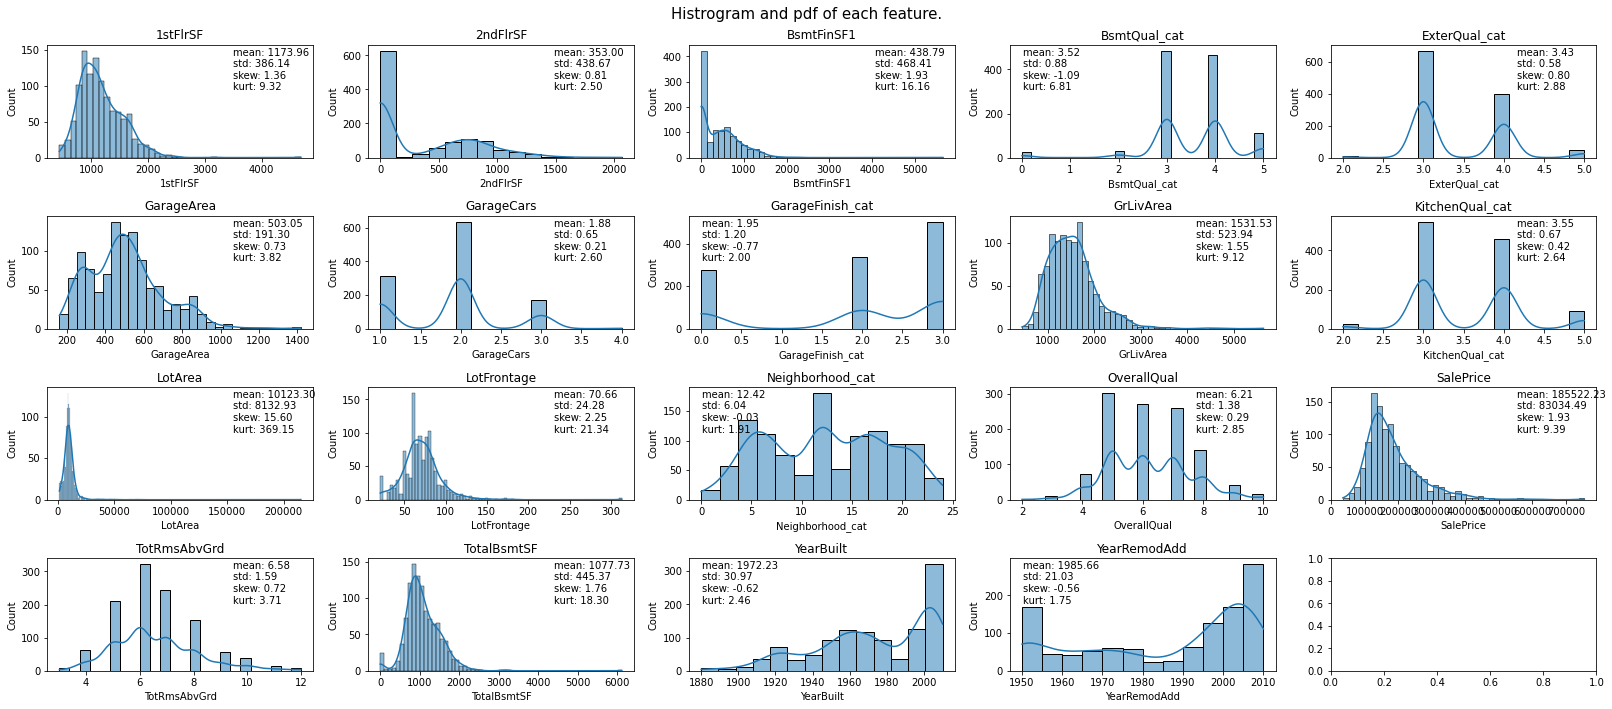

In [317]:
row_num = 4
features_reshape = reshapeToPlot(row_num, features)
col_num = len(features_reshape[0])

fig, ax = plt.subplots(row_num, col_num, figsize=(4.5*col_num,10))
fig.suptitle('Histrogram and pdf of each feature.', size=15)

for i in range(row_num):
    for j in range(col_num):
        try:
            plotpdf(df_house_clean, features_reshape[i][j], ax[i][j])
        except:
            pass

- SalePrice: The graph is right skew (1.93) and with Kurtoris equals to 9.39 this means more outliers than normal distribution.
- OverallQual: The graph is pretty normal distribution with skewness equals to 0.29 and Kurtoris equals to 2.85.
- GrLivArea: The graph is right skew (1.55) and with Kurtoris equals to 9.12 this means more outliers than normal distribution.
- GarageCars: The graph is normal skew (0.21) and with Kurtoris equals to 2.60 this leads to normal distribution.
- GarageArea: The graph looks like it is consist of 3 distributions with a little bit of right skew (Skewness equals to 0.73) and a little bit of outliners (Kurtoris equals to 3.82).
- TotalBsmtSF: The graph is right skew (1.76) and with Kurtoris equals to 18.30 this means more outliers than normal distribution.
- 1stFlrSF: The graph is right skew (1.36) and with kurtoris equals to 9.32 his means more outliers than normal distribution.
- FullBath: 
- TotRmsAbvGrd: The graph is normal skew (0.72) and with Kurtoris equals to 3.71 this leads to normal distribution.
- YearBuilt: The graph is left skew (-0.62) and with kurtoris equals to 2.46 his means less outliers than normal distribution.
- YearRemodAdd: The graph is left skew (-0.56) and with kurtoris equals to 1.75 his means more outliers than normal distribution.
- YearGerageYrBlt: The graph is left skew (-0.64) and with kurtoris equals to 2.44 his means more outliers than normal distribution.

### 5.3 Scatter plot

In [262]:
def corrfunc(x, y,**kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("Corr = {:.4f}".format(r), xy=(.8, .9), xycoords=ax.transAxes)

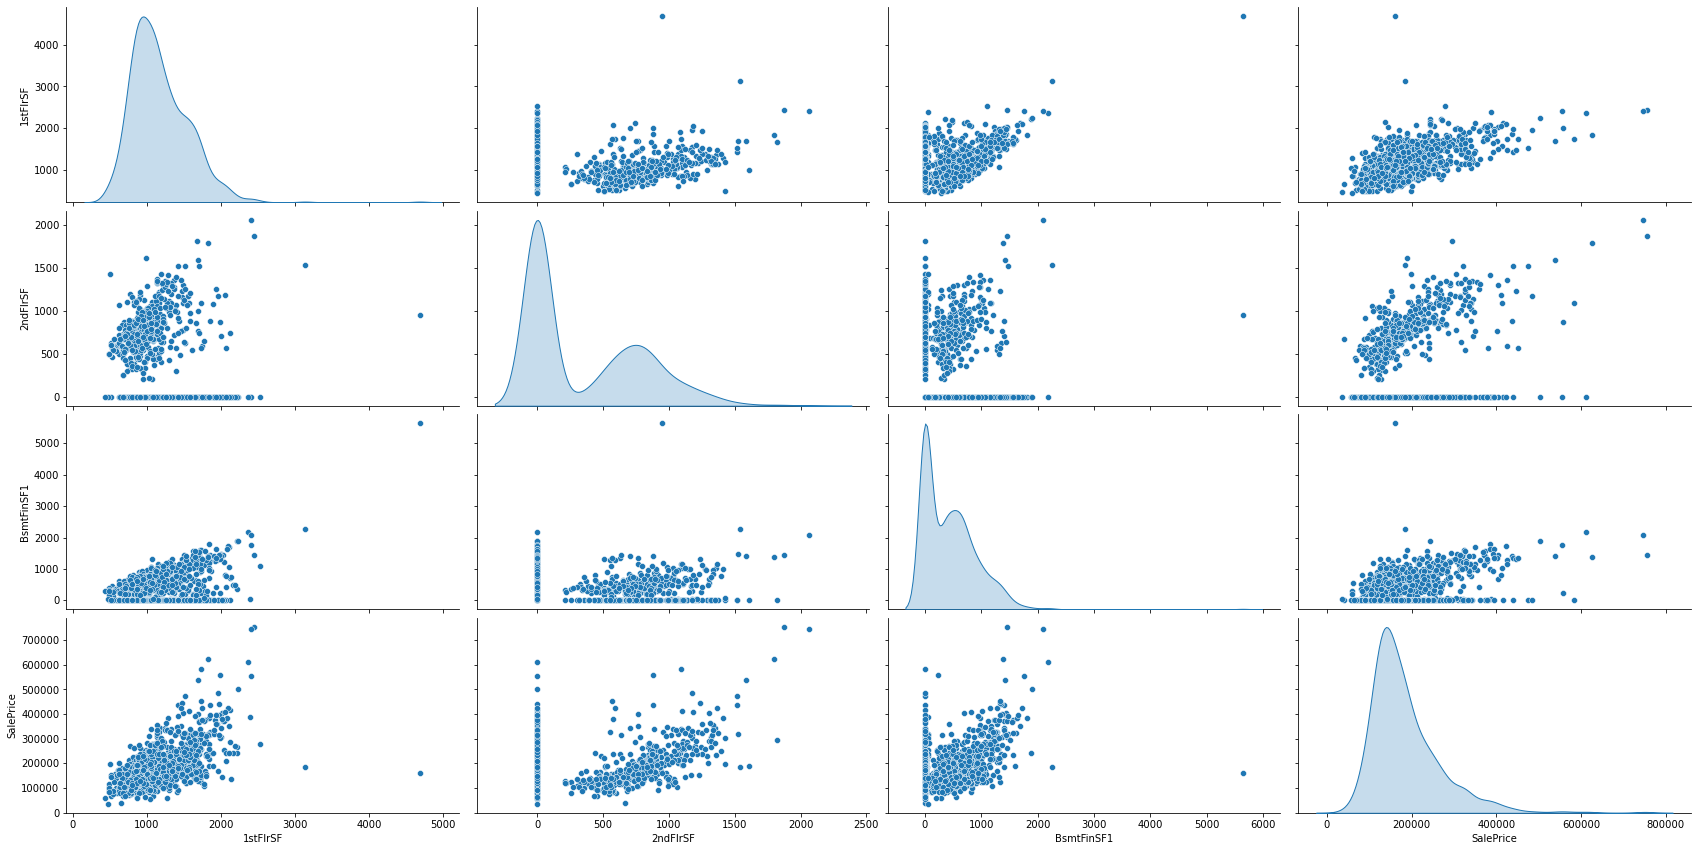

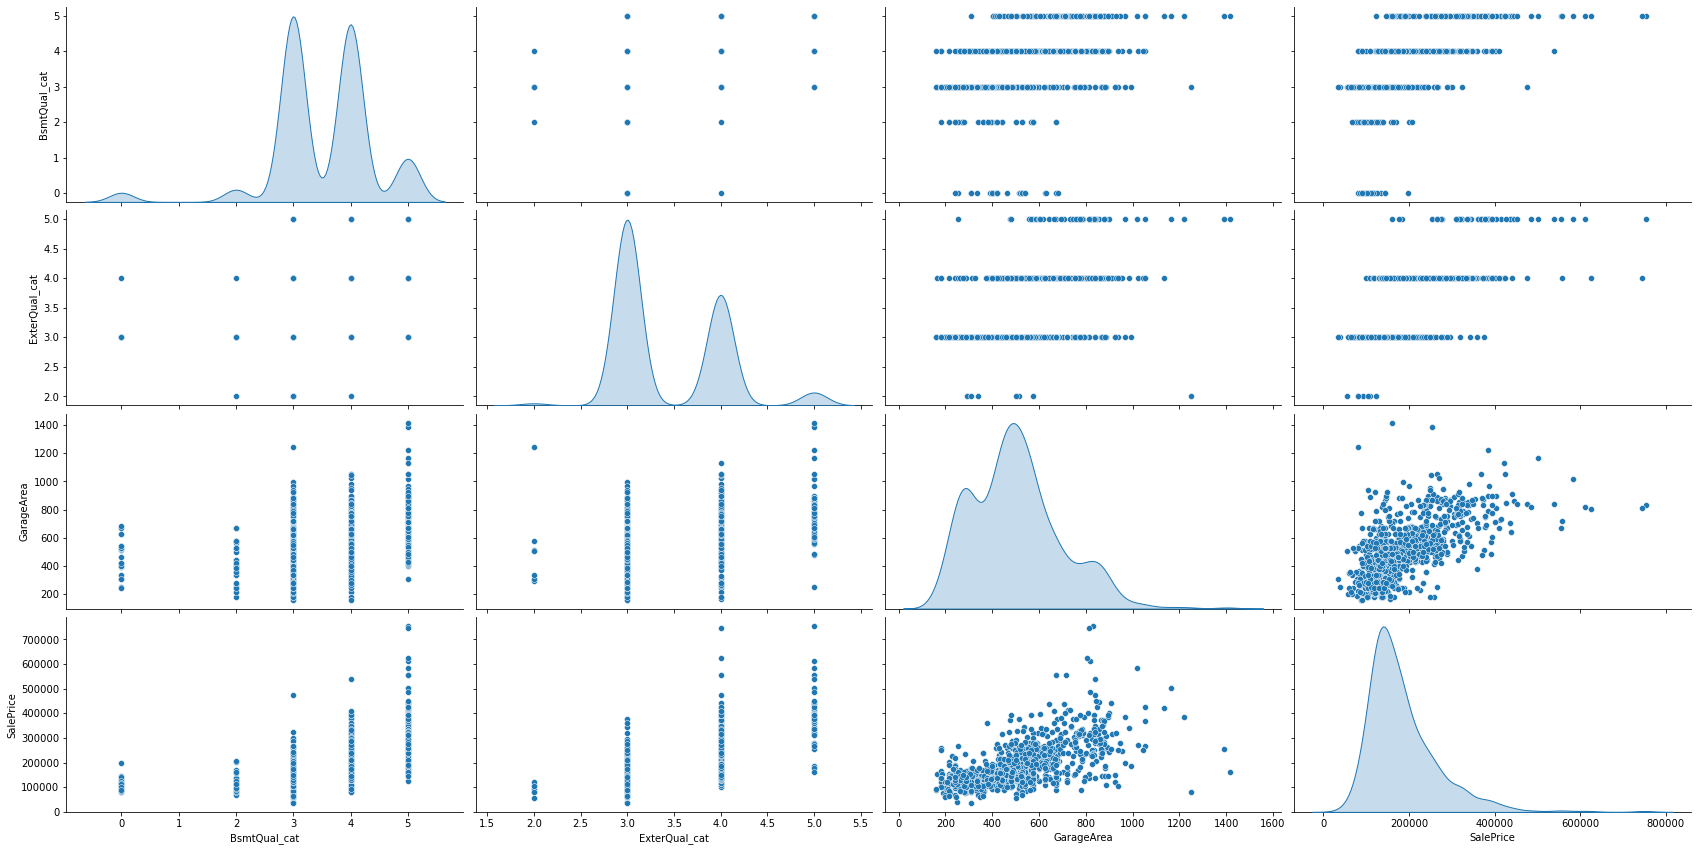

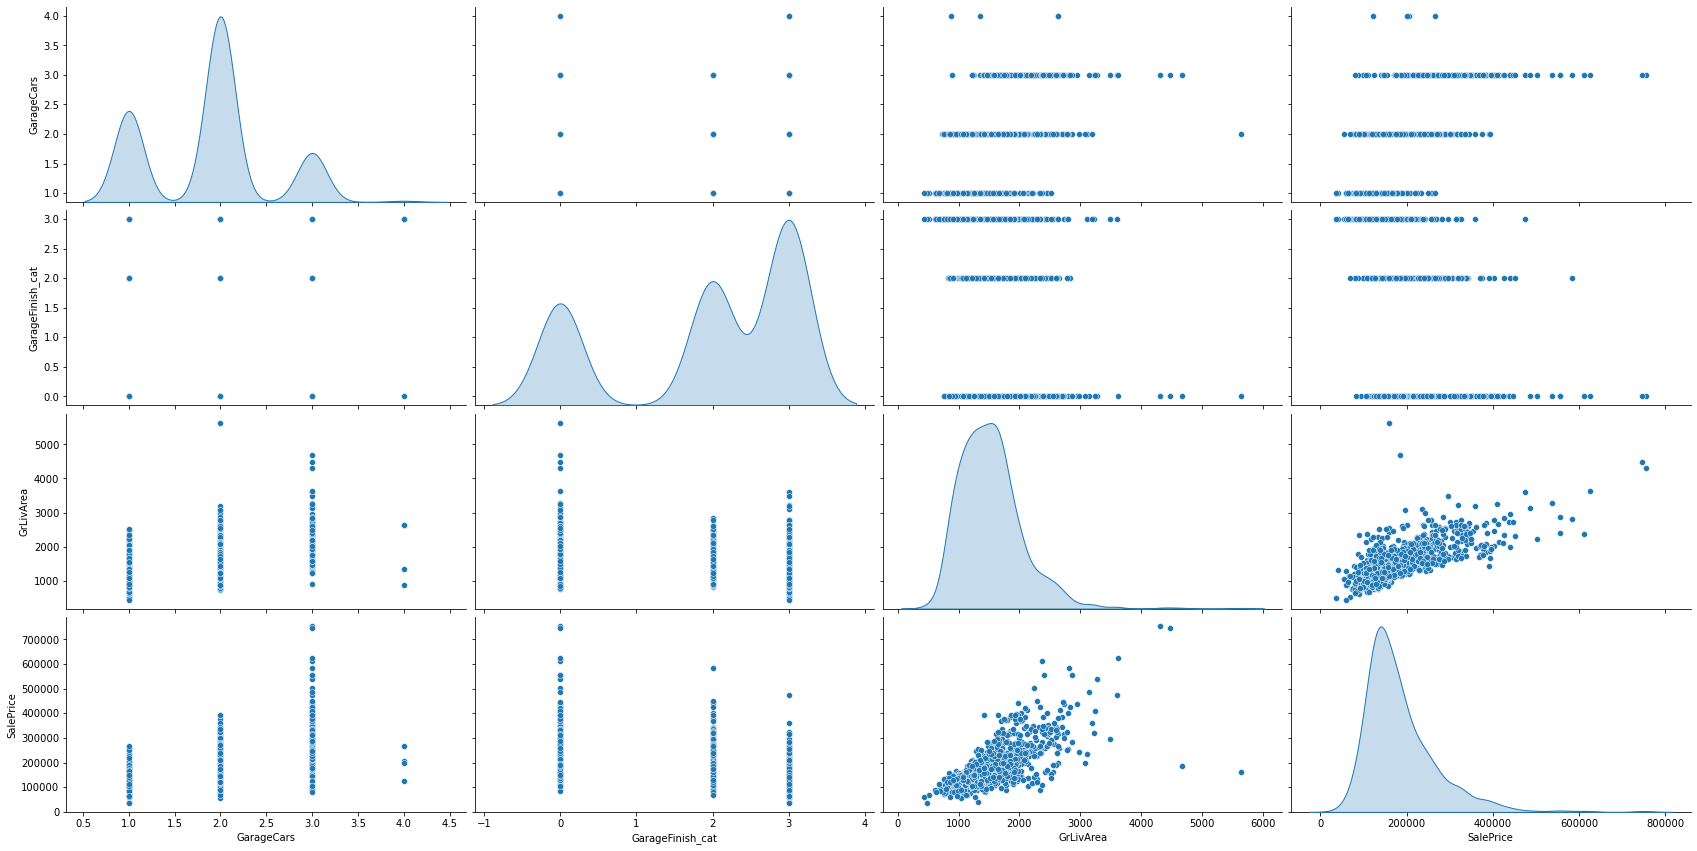

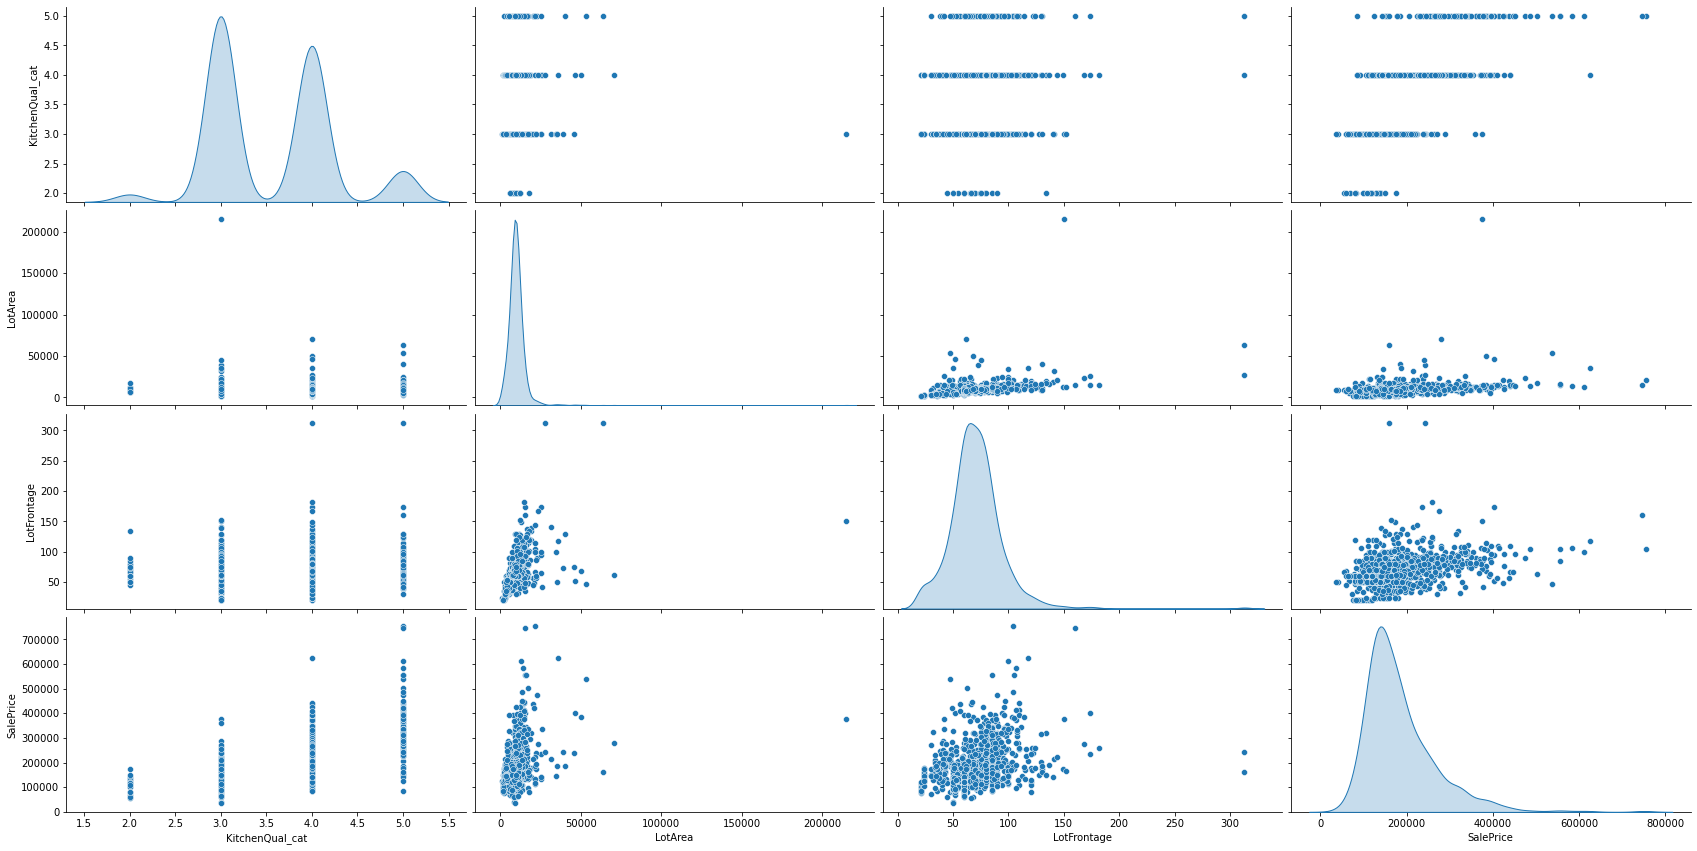

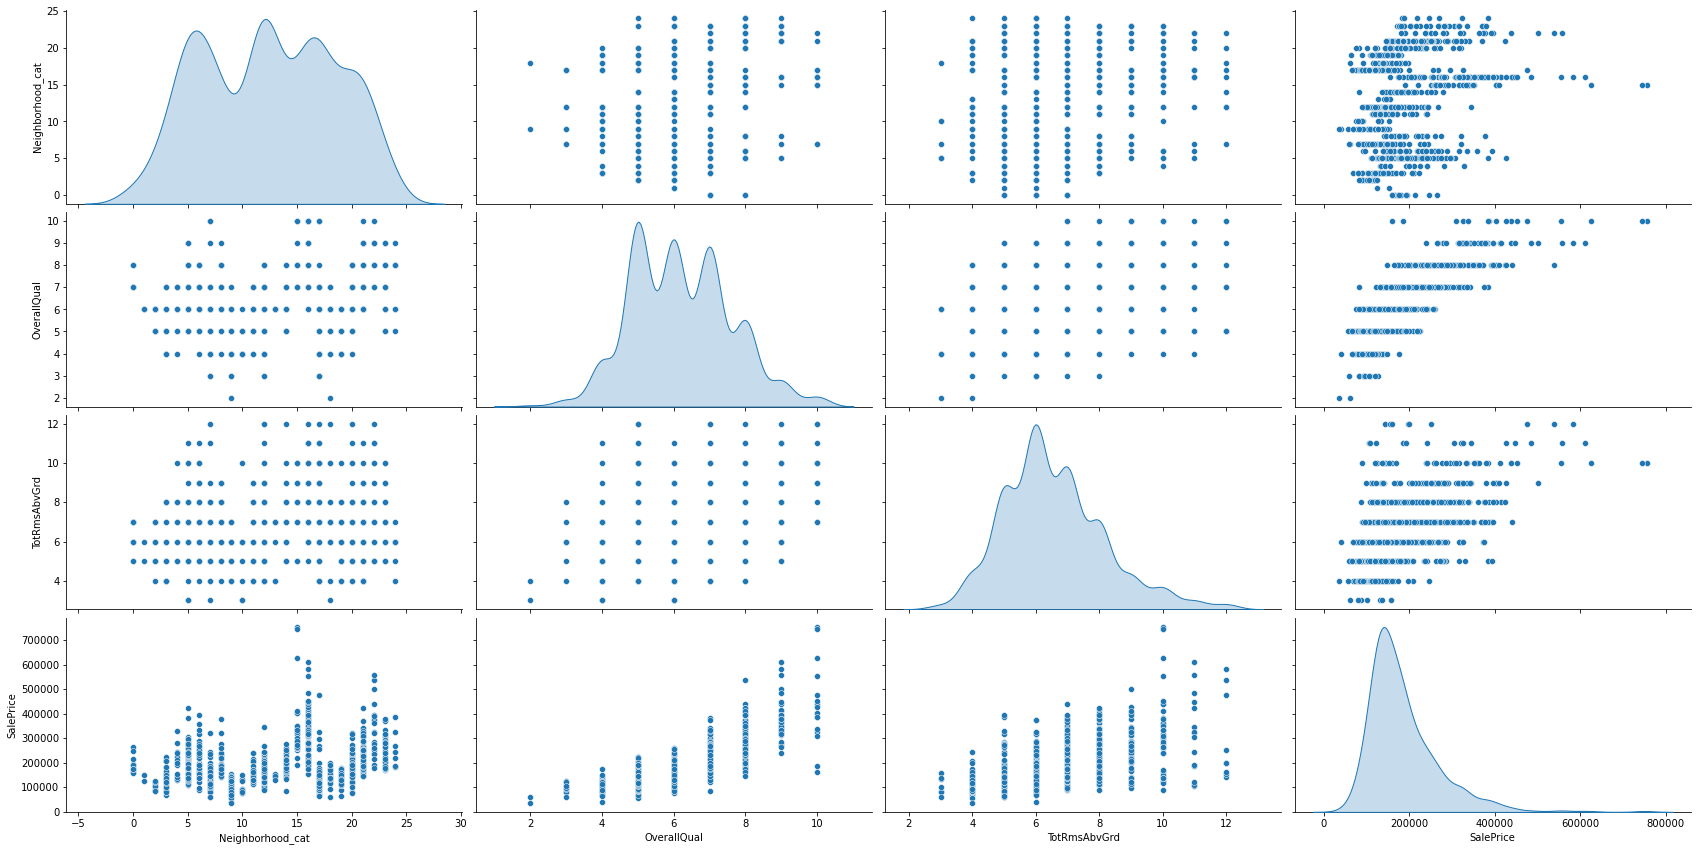

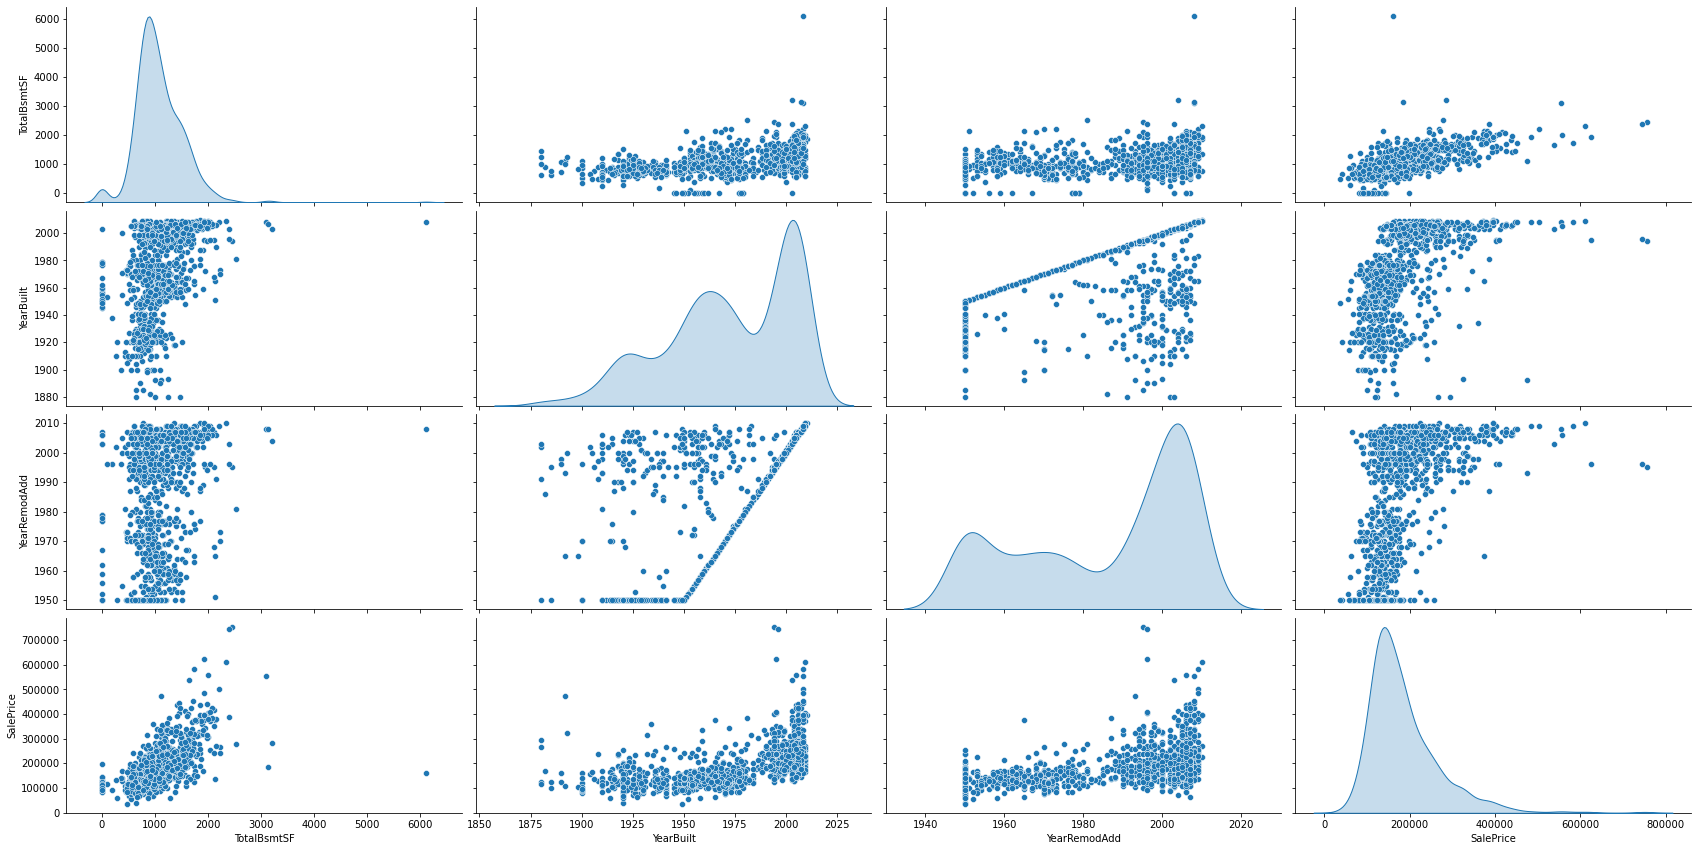

In [328]:
features_temp = features.copy()
features_temp.remove('SalePrice')
features_reshape = reshapeToPlot(6, features_temp)
features_reshape
for columns in features_reshape:
    try:
        a_list = list(columns)
        a_list.append('SalePrice')
        #print(a_list)
        g = sns.pairplot(df_house_clean[a_list], diag_kind="kde", height=3, aspect=2)
    except:
        pass


## 6. Third component in your report: identify and document interesting structure in your dataset. You might want to look for findings like the following (incomplete list of suggestions):

### 6.1 Are there "outliers"?

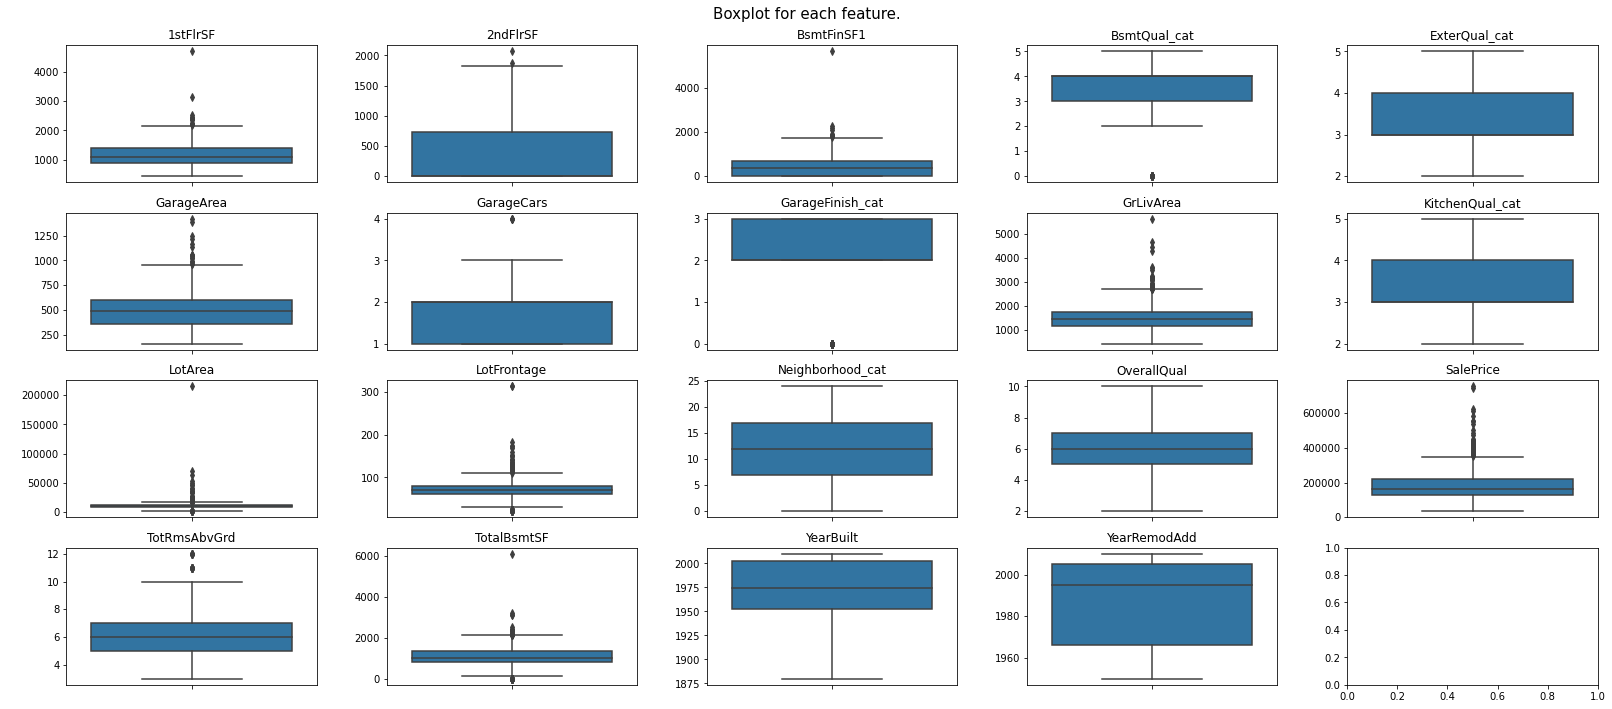

In [475]:
row_num = 4
features_reshape = reshapeToPlot(row_num, features)
col_num = len(features_reshape[0])

fig, ax = plt.subplots(row_num, col_num, figsize=(4.5*col_num,10))
fig.suptitle('Boxplot for each feature.', size=15)

for i in range(row_num):
    for j in range(col_num):
        try:
            sns.boxplot(data=df_house_clean, y=features_reshape[i][j], ax=ax[i][j])
            ax[i][j].set_title(features_reshape[i][j])
            ax[i][j].set_ylabel(' ')
            plt.tight_layout()
        except:
            pass

In [632]:
df_temp = df_house_clean.select_dtypes(include=['int64', 'int8', 'float64'])
#df_temp = df_house_clean[features]
Q1 = df_temp.quantile(0.25)
Q3 = df_temp.quantile(0.75)
IQR = Q3 - Q1
floor = Q1 - 1.5 * IQR
cap = Q3 + 1.5 * IQR
df_outliner_num = ((df_temp < floor) | (df_temp > cap)).sum()
(df_outliner_num/df_temp.shape[0])*100

MSSubClass            6.964286
LotFrontage           7.232143
LotArea               5.714286
OverallQual           0.000000
OverallCond           7.857143
YearBuilt             0.000000
YearRemodAdd          0.000000
MasVnrArea            6.339286
BsmtFinSF1            0.714286
BsmtFinSF2           10.982143
BsmtUnfSF             1.607143
TotalBsmtSF           3.660714
1stFlrSF              1.071429
2ndFlrSF              0.178571
LowQualFinSF          1.517857
GrLivArea             2.500000
BsmtFullBath          0.000000
BsmtHalfBath          5.446429
FullBath              0.000000
HalfBath              0.000000
BedroomAbvGr          1.964286
KitchenAbvGr          4.196429
TotRmsAbvGrd          2.142857
Fireplaces            0.357143
GarageYrBlt           0.000000
GarageCars            0.357143
GarageArea            1.428571
WoodDeckSF            1.785714
OpenPorchSF           4.553571
EnclosedPorch        14.107143
3SsnPorch             1.607143
ScreenPorch           8.482143
PoolArea

In [633]:
df_temp2 = df_temp.copy()
for feature in df_temp2.columns:
    df_temp2[feature] = df_temp2[feature].mask(df_temp[feature] < floor[feature], Q1[feature])
    df_temp2[feature] = df_temp2[feature].mask(df_temp[feature] > cap[feature], Q3[feature])


In [634]:
df_temp2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HeatingQC_cat,ExterQual_cat,ExterCond_cat,BsmtQual_cat,BsmtCond_cat,KitchenQual_cat,FireplaceQu_cat,GarageQual_cat,GarageCond_cat,PoolQC_cat,BsmtExposure_cat,MSZoning_cat,Street_cat,Alley_cat,LotShape_cat,LandContour_cat,Utilities_cat,LotConfig_cat,LandSlope_cat,Neighborhood_cat,Condition1_cat,Condition2_cat,BldgType_cat,HouseStyle_cat,RoofStyle_cat,RoofMatl_cat,Exterior1st_cat,Exterior2nd_cat,MasVnrType_cat,Foundation_cat,BsmtFinType1_cat,BsmtFinType2_cat,Heating_cat,CentralAir_cat,Electrical_cat,Functional_cat,GarageType_cat,GarageFinish_cat,PavedDrive_cat,Fence_cat,MiscFeature_cat,SaleType_cat,SaleCondition_cat
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7,5.0,2003,2003,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1,0.0,2,1,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2,2008,208500.0,5,4,3.0,4.0,3.0,4,0,3.0,3.0,0.0,1.0,3.0,1.0,1.0,3,3.0,0,4.0,0.0,5,2.0,2.0,0.0,5,1.0,1.0,12.0,13.0,1,2.0,2,6.0,1.0,1.0,4.0,6.0,1,2.0,2.0,4.0,-1.0,8.0,4.0
2,20.0,80.0,9600.0,6,6.0,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0,0.0,2,0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2007,181500.0,5,3,3.0,4.0,3.0,3,3,3.0,3.0,0.0,2.0,3.0,1.0,1.0,3,3.0,0,4.0,0.0,24,2.0,2.0,0.0,2,1.0,1.0,8.0,8.0,2,1.0,0,6.0,1.0,1.0,4.0,6.0,1,2.0,2.0,4.0,-1.0,8.0,4.0
3,60.0,68.0,11250.0,7,5.0,2001,2002,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1,0.0,2,1,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9,2008,223500.0,5,4,3.0,4.0,3.0,4,3,3.0,3.0,0.0,2.0,3.0,1.0,1.0,0,3.0,0,4.0,0.0,5,2.0,2.0,0.0,5,1.0,1.0,12.0,13.0,1,2.0,2,6.0,1.0,1.0,4.0,6.0,1,2.0,2.0,4.0,-1.0,8.0,4.0
4,70.0,60.0,9550.0,7,5.0,1915,1970,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1,0.0,1,0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,2,2006,140000.0,4,3,3.0,3.0,3.0,4,4,3.0,3.0,0.0,1.0,3.0,1.0,1.0,0,3.0,0,4.0,0.0,6,2.0,2.0,0.0,5,1.0,1.0,13.0,15.0,2,0.0,0,6.0,1.0,1.0,4.0,6.0,5,3.0,2.0,4.0,-1.0,8.0,4.0
5,60.0,84.0,14260.0,8,5.0,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1,0.0,2,1,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12,2008,250000.0,5,4,3.0,4.0,3.0,4,3,3.0,3.0,0.0,3.0,3.0,1.0,1.0,0,3.0,0,4.0,0.0,15,2.0,2.0,0.0,5,1.0,1.0,12.0,13.0,1,2.0,2,6.0,1.0,1.0,4.0,6.0,1,2.0,2.0,4.0,-1.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,62.0,7917.0,6,5.0,1999,2000,0.0,0.0,0.0,953.0,953.0,953.0,694.0,0.0,1647.0,0,0.0,2,1,3.0,1.0,7.0,1.0,1999.0,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8,2007,175000.0,5,3,3.0,4.0,3.0,3,3,3.0,3.0,0.0,1.0,3.0,1.0,1.0,3,3.0,0,4.0,0.0,8,2.0,2.0,0.0,5,1.0,1.0,12.0,13.0,2,2.0,6,6.0,1.0,1.0,4.0,6.0,1,2.0,2.0,4.0,-1.0,8.0,4.0
1457,20.0,85.0,13175.0,6,6.0,1978,1988,119.0,790.0,0.0,589.0,1542.0,2073.0,0.0,0.0,2073.0,1,0.0,2,0,3.0,1.0,7.0,2.0,1978.0,2.0,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2010,210000.0,3,3,3.0,4.0,3.0,3,3,3.0,3.0,0.0,1.0,3.0,1.0,1.0,3,3.0,0,4.0,0.0,14,2.0,2.0,0.0,2,1.0,1.0,9.0,10.0,3,1.0,0,6.0,1.0,1.0,4.0,6.0,1,3.0,2.0,4.0,-1.0,8.0,4.0
1458,70.0,66.0,9042.0,7,6.0,1941,2006,0.0,275.0,0.0,877.0,1152.0,1188.0,1152.0,0.0,2340.0,0,0.0,2,0,4.0,1.0,9.0,2.0,1941.0,1.0,252.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,5,2010,266500.0,5,5,3.0,3.0,3.0,4,4,3.0,3.0,0.0,1.0,3.0,1.0,1.0,3,3.0,0,4.0,0.0,6,2.0,2.0,0.0,5,1.0,1.0,5.0,

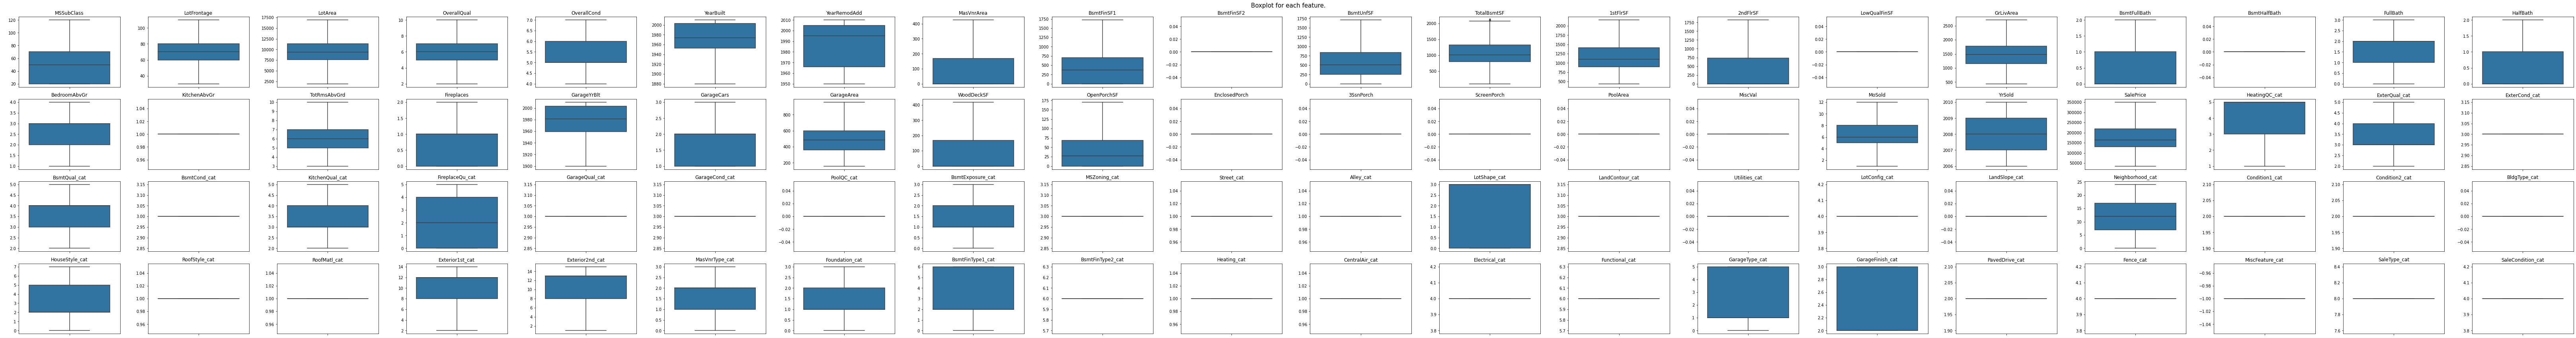

In [635]:
row_num = 4
features_reshape = reshapeToPlot(row_num, df_temp2.columns)
col_num = len(features_reshape[0])

fig, ax = plt.subplots(row_num, col_num, figsize=(4.5*col_num,3*row_num))
fig.suptitle('Boxplot for each feature.', size=15)

for i in range(row_num):
    for j in range(col_num):
        try:
            sns.boxplot(data=df_temp2, y=features_reshape[i][j], ax=ax[i][j])
            ax[i][j].set_title(features_reshape[i][j])
            ax[i][j].set_ylabel(' ')
            plt.tight_layout()
        except:
            pass

In [636]:
df_house_clean2 = df_temp2.copy()

### 6.2 PCA

In [625]:
features

['1stFlrSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 'BsmtQual_cat',
 'ExterQual_cat',
 'GarageArea',
 'GarageCars',
 'GarageFinish_cat',
 'GrLivArea',
 'KitchenQual_cat',
 'LotArea',
 'LotFrontage',
 'Neighborhood_cat',
 'OverallQual',
 'SalePrice',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

In [640]:
from sklearn.preprocessing import StandardScaler
#df_temp = df_house_clean.select_dtypes(include=['int64', 'int8', 'float64'])
df_temp = df_house_clean2[features]
#df_temp = df_house_clean2[['OverallQual', 'GrLivArea', 'SalePrice']]
df_x = df_temp.loc[:, df_temp.columns != 'SalePrice']
df_y = df_temp['SalePrice']

# Standardizing the features
df_x = StandardScaler().fit_transform(df_x)

In [641]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)

#df_temp = df_house_clean.select_dtypes(include=['int64', 'int8', 'float64'])
X_train = pca.fit_transform(df_x)
#X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
df_X_train = pd.DataFrame(data = X_train
             , columns = ['principal component 1', 'principal component 2'])
df_X_train

,principal component 1,principal component 2
0,1.551060,0.530882
1,0.223913,-1.023093
2,1.595242,0.329961
3,-0.636164,1.955483
4,4.133822,2.240251
...,...,...
1115,-0.068664,0.437805
1116,1.356932,0.303248
1117,1.171364,2.320050
1118,-2.349749,-0.791544


In [642]:
print(explained_variance)
print(explained_variance[0]+explained_variance[1])

[0.4130393  0.12178694]
0.5348262398132232


In [643]:
df_pca = pd.concat([df_X_train, df_y.reset_index()], axis = 1)
df_pca

,principal component 1,principal component 2,Id,SalePrice
0,1.551060,0.530882,1,208500.0
1,0.223913,-1.023093,2,181500.0
2,1.595242,0.329961,3,223500.0
3,-0.636164,1.955483,4,140000.0
4,4.133822,2.240251,5,250000.0
...,...,...,...,...
1115,-0.068664,0.437805,1456,175000.0
1116,1.356932,0.303248,1457,210000.0
1117,1.171364,2.320050,1458,266500.0
1118,-2.349749,-0.791544,1459,142125.0


In [644]:
from scipy import stats
x = df_pca['principal component 1']
y = df_pca['principal component 2']
r, _ = stats.pearsonr(x, y)
r

0.0

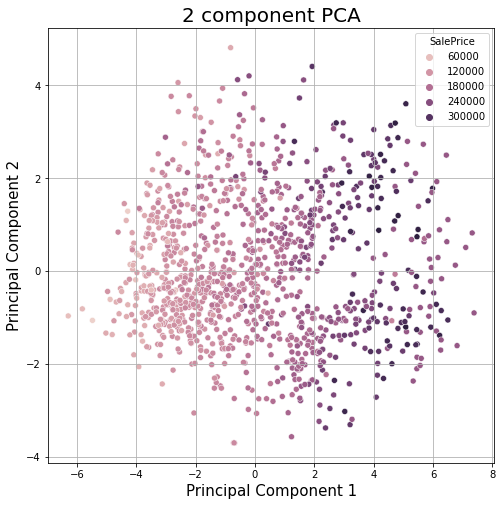

In [645]:
# After PCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
sns.scatterplot(data=df_pca, x="principal component 1", y="principal component 2", hue="SalePrice")
#ax.legend(targets)
ax.grid()

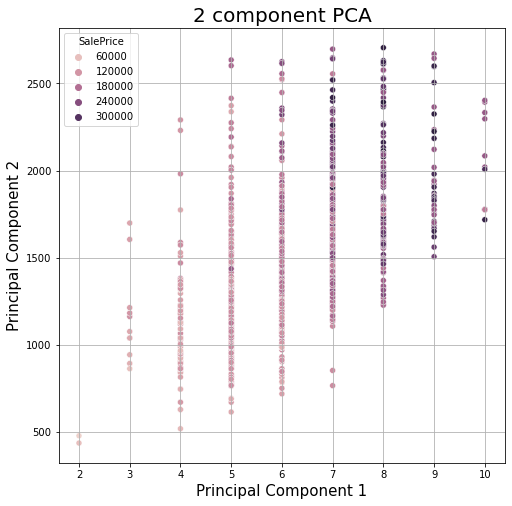

In [646]:
# Compare before PCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
sns.scatterplot(data=df_temp, x="OverallQual", y="GrLivArea", hue="SalePrice")
#ax.legend(targets)
ax.grid()

In [647]:
# Compare with after scaler
df_x_test = pd.DataFrame(data = df_x
             , columns = ['OverallQual', 'GrLivArea'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
sns.scatterplot(x=df_x_test['OverallQual'], y=df_x_test['GrLivArea'], hue=df_temp["SalePrice"])
#ax.legend(targets)
ax.grid()

ValueError: Shape of passed values is (1120, 18), indices imply (1120, 2)

## 7. Prediction

### 7.1 asdasd

In [737]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
#import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [685]:
features_pred = ['OverallQual', 'GrLivArea', 'SalePrice']
df_train = df_house_clean2[features_pred]
df_train_x = df_train.drop('SalePrice', axis=1)
df_train_y = df_train['SalePrice']

In [689]:
# pre-processsing step
# Drop the columns - 
# Impute the missing values in column Item_Weight by mean
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('scale_data', StandardScaler(), ['OverallQual', 'GrLivArea'])])


In [695]:
# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""
model_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])
# fit the pipeline with the training data
model_pipeline.fit(df_train_x,df_train_y)

# predict target values on the training data
df_pred = model_pipeline.predict(df_train_x)


In [699]:
df_train_y.reset_index()

,Id,SalePrice
0,1,208500.0
1,2,181500.0
2,3,223500.0
3,4,140000.0
4,5,250000.0
...,...,...
1115,1456,175000.0
1116,1457,210000.0
1117,1458,266500.0
1118,1459,142125.0


In [698]:
df_pred

array([189639.29449121, 174013.90076878, 213502.79013997, ...,
       264022.65253968, 129250.30597299, 137595.64140697])

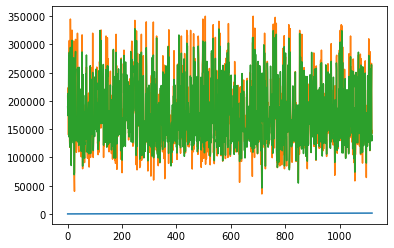

In [700]:
plt.plot(df_train_y.reset_index())
plt.plot(df_pred)

### 7.2 asd

In [739]:
features_pred = ['OverallQual', 'GrLivArea', 'SalePrice']
df_train = df_house_clean2
df_train_x = df_train.drop('SalePrice', axis=1)
df_train_y = df_train['SalePrice']


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
randomForest = RandomForestRegressor(max_depth=10)
linear = LinearRegression()

#pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])
pipe = Pipeline(steps=[("scaler", scaler), 
                       ("pca", pca), 
                       ("randomForest", randomForest)])

#X_digits, y_digits = datasets.load_digits(return_X_y=True)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "randomForest__random_state": [2, 5, 10]
    #"randomForest__random_state": range(10,100,10)
}

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(df_train_x,df_train_y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.815):
{'pca__n_components': 60, 'randomForest__random_state': 10}


<AxesSubplot:>

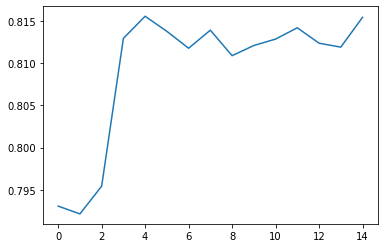

In [736]:
qwe = pd.DataFrame(search.cv_results_)
qwe['mean_test_score'].plot()

In [743]:
features_pred = ['OverallQual', 'GrLivArea', 'SalePrice']
df_train = df_house_clean2
df_train_x = df_train.drop('SalePrice', axis=1)
df_train_y = df_train['SalePrice']


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
randomForest = RandomForestRegressor(max_depth=10)
linear = LinearRegression()

#pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])
pipe = Pipeline(steps=[("scaler", scaler), 
                       ("pca", pca), 
                       ("linear", linear)])

#X_digits, y_digits = datasets.load_digits(return_X_y=True)
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": range(1, 79, 2)
    #"randomForest__random_state": [2, 5, 10]
    #"randomForest__random_state": range(10,100,10)
}

search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(df_train_x,df_train_y)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.797):
{'pca__n_components': 41}


In [747]:
qwe = pd.DataFrame(search.cv_results_)
display(qwe)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011719,0.001715,0.003131,0.000250,1,{'pca__n_components': 1},0.771015,0.721450,0.702480,0.783752,0.725867,0.740913,0.031060,39
1,0.011840,0.001024,0.003160,0.000251,3,{'pca__n_components': 3},0.789665,0.742381,0.714793,0.801169,0.751622,0.759926,0.031620,38
2,0.010933,0.000382,0.002932,0.000300,5,{'pca__n_components': 5},0.794529,0.742575,0.719894,0.803256,0.750457,0.762142,0.031760,37
3,0.011234,0.000467,0.002858,0.000232,7,{'pca__n_components': 7},0.808481,0.752972,0.728448,0.816914,0.760612,0.773485,0.033840,36
4,0.011011,0.000492,0.003212,0.000494,9,{'pca__n_components': 9},0.808559,0.752720,0.728608,0.818126,0.765519,0.774706,0.033835,35
5,0.011092,0.000902,0.002931,0.000223,11,{'pca__n_components': 11},0.812898,0.754323,0.737024,0.825637,0.775634,0.781103,0.033717,29
6,0.012082,0.000839,0.003970,0.000489,13,{'pca__n_components': 13},0.816195,0.749496,0.748687,0.826681,0.773402,0.782892,0.032869,26
7,0.013467,0.002509,0.003687,0.000772,15,{'pca__n_components': 15},0.816384,0.749951,0.748774,0.827585,0.773598,0.783259,0.033027,24
8,0.017070,0.002861,0.004286,0.001144,17,{'pca__n_components': 17},0.813116,0.749846,0.749029,0.826875,0.773297,0.782432,0.032180,27
9,0.013228,0.002637,0.002880,0.000620,19,{'pca__n_components': 19},0.803500,0.753047,0.750330,0.822807,0.774291,0.780795,0.028358,34


<AxesSubplot:>

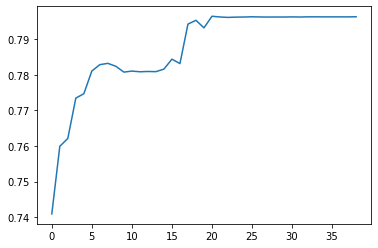

In [746]:
qwe['mean_test_score'].plot()